In [4]:
# EDA libraries - exploratory data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

# Plots to appear in notebook
%matplotlib inline


import time

## 1. Load Data

In [5]:
data_path = '/Users/korir/ml/Telecom churn project/datasets/telecom.csv'

In [6]:
df = pd.read_csv(data_path)
# Rows, Cols
df.shape

(3333, 21)

## 2. Exploratory Data Analysis (EDA)

1. What question(s) are you trying to solve (or prove wrong)?
Whether or not a customer will churn
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
No missing data, it's just unbalanced
4. Where are the outliers and why should you care about them?
No outliers, how to find the outliers
5. How can you add, change or remove features to get more out of your data?
Feature engineering 101
6. Determine the categorical features

In [7]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
# Get summary stats on numerical features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 2.1 Distribution of features

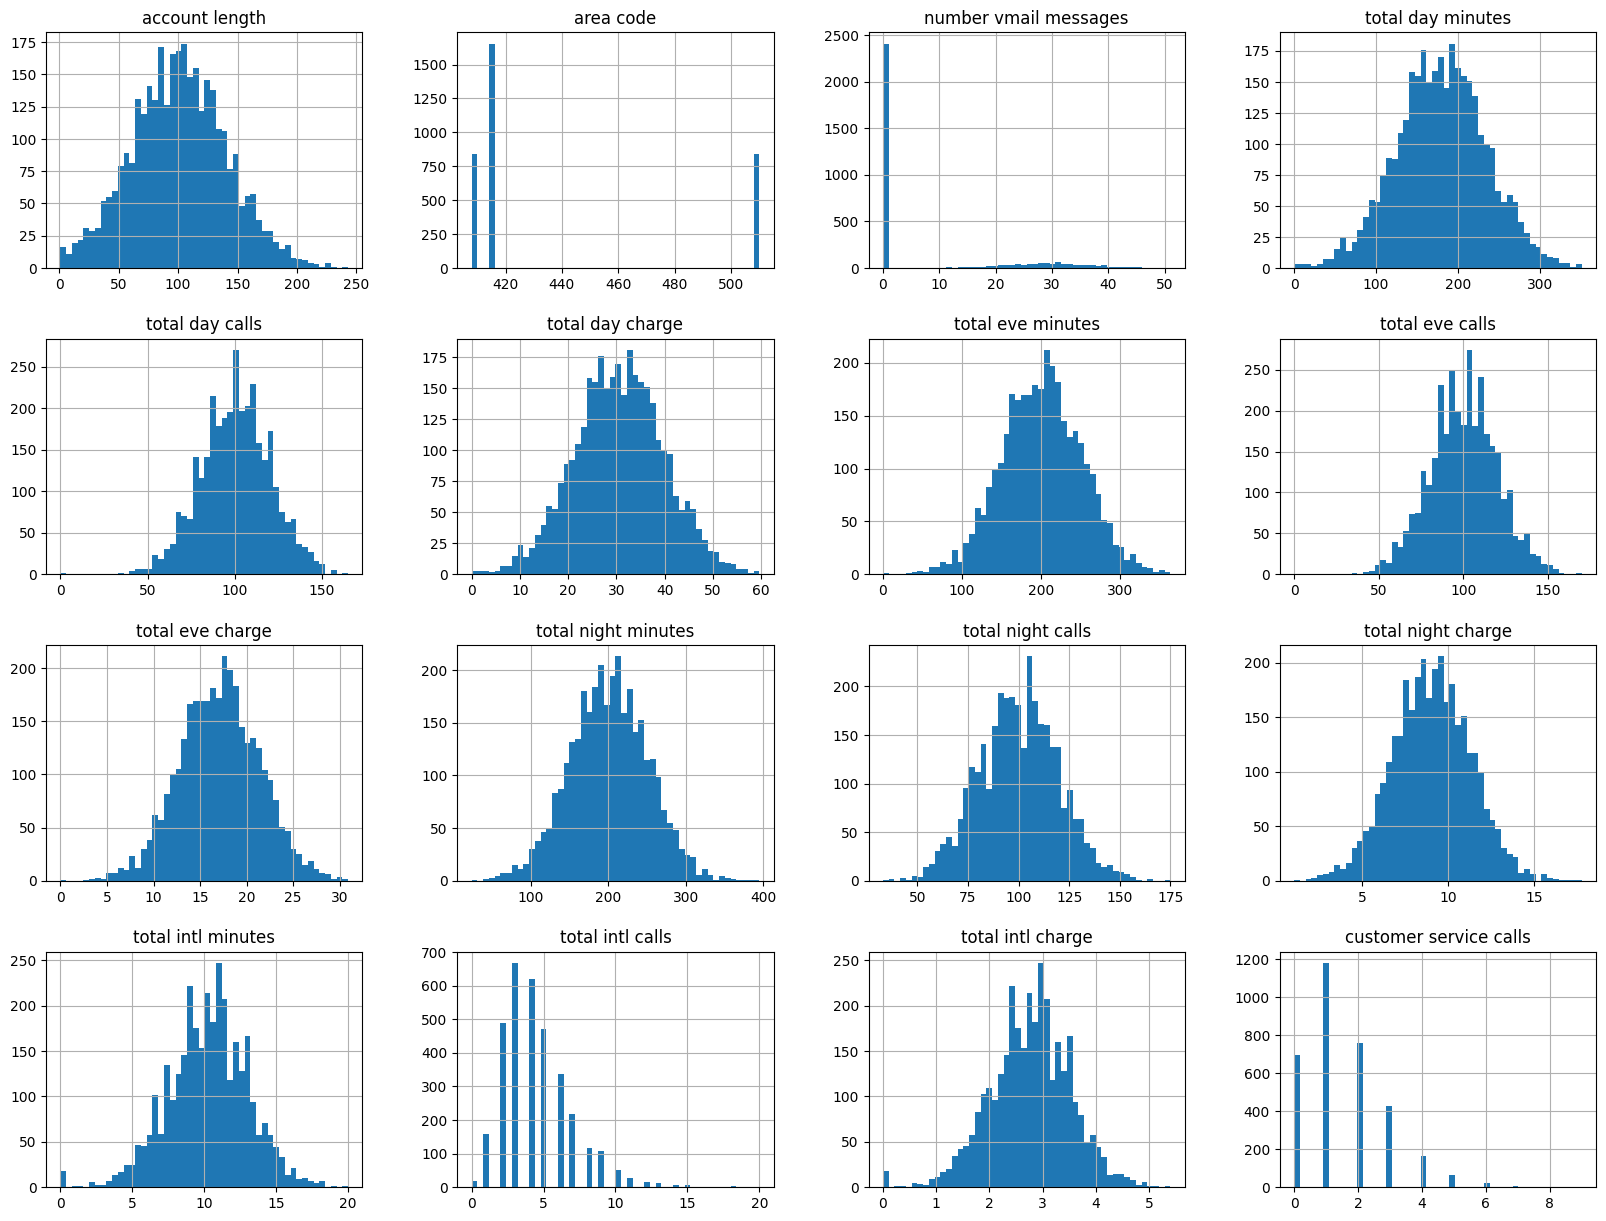

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

### 2.2 Descriptive analysis

In [11]:
df.churn.value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='churn'>

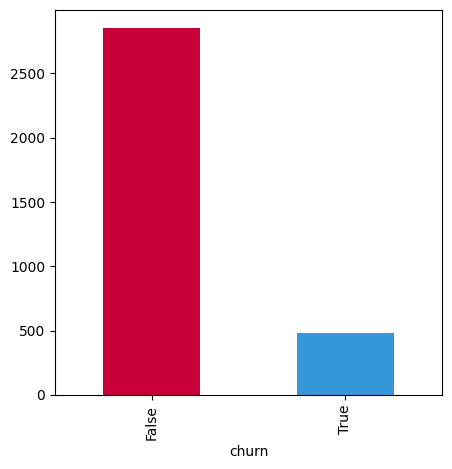

In [12]:
df.churn.value_counts().plot(kind='bar', figsize=(5,5), color=["#C70039", "#3498DB"])

In [13]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [14]:
pd.crosstab(df['international plan'], df.churn)

churn,False,True
international plan,,
no,2664,346
yes,186,137


What can I infer from this?
More people without international plans churn compared to those with international plans

<Axes: xlabel='international plan'>

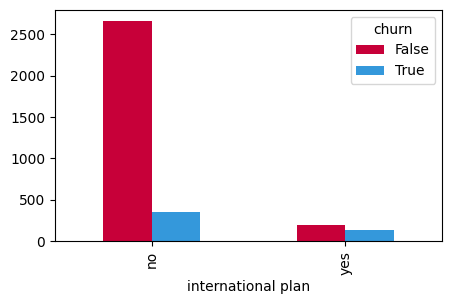

In [15]:
pd.crosstab(df['international plan'], df.churn).plot(kind='bar',
                                                     figsize=(5, 3),
                                                     color=["#C70039", "#3498DB"])

The number of customers without an international plan churned more as compared to the customers who don't have an international plan

In [16]:
df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [17]:
pd.crosstab(df['voice mail plan'], df.churn)

churn,False,True
voice mail plan,,
no,2008,403
yes,842,80


<Axes: xlabel='voice mail plan'>

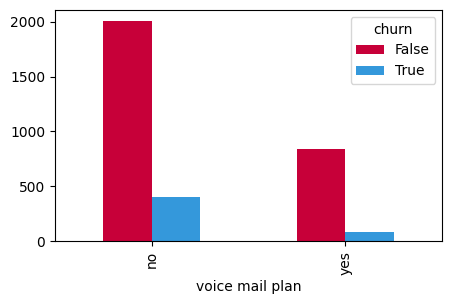

In [18]:
pd.crosstab(df['voice mail plan'], df.churn).plot(kind='bar',
                                                     figsize=(5, 3),
                                                     color=["#C70039", "#3498DB"])

Customers without voice mail plans have a higher churn rate than those with voice mail plans

In [19]:
df['customer service calls'].value_counts()

customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

In [20]:
pd.crosstab(df['customer service calls'], df['churn'])

churn,False,True
customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


<Axes: xlabel='customer service calls'>

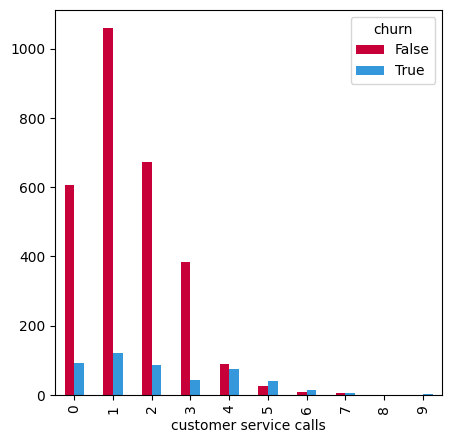

In [21]:
pd.crosstab(df['customer service calls'], df.churn).plot(kind='bar',
                                                     figsize=(5, 5),
                                                     color=["#C70039", "#3498DB"])

What can I infer from this: Customers who have made at least one customer service call have churned more

<Axes: xlabel='international plan'>

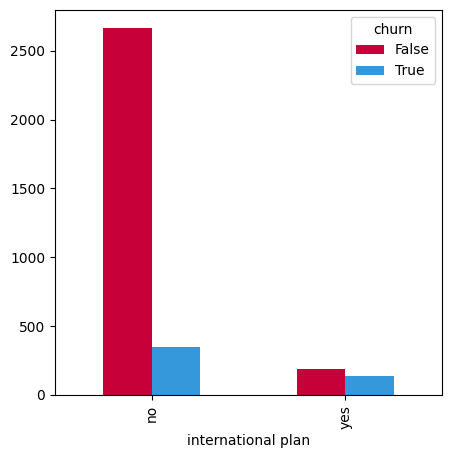

In [22]:
pd.crosstab(df['international plan'], df.churn).plot(kind='bar',
                                                     figsize=(5, 5),
                                                     color=["#C70039", "#3498DB"])

Customers who don't have an international plan have churned more as compared to those with international plans

In [23]:
# import math
# def plt_relationships(columns):

#     no_of_columns = 2
#     no_of_rows = math.ceil(len(columns) / 2)

#     fig = plt.figure(figsize=(12, 5 * no_of_rows))

#     for index, column in enumerate(columns, 1):

#         ax = fig.add_subplot(no_of_rows, no_of_columns, index)

#         churn_by_feature = pd.crosstab(df[column], df['churn'])
        
#         churn_by_feature.plot(kind='bar', ax=ax, stacked=True,
#                               rot=0, color=['#C70039', '#3498DB'])

### 2.4 Label encoding for categorical features

In [24]:
label_encoder = LabelEncoder()

In [25]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

In [26]:
df['churn'] = label_encoder.fit_transform(df['churn'])

In [27]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [28]:
df.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [29]:
df = df.drop(columns='phone number')

### 2.5 Correlation matrix before balancing the dataset

In [30]:
corr_matrix = df.corr()
corr_matrix

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


<Axes: >

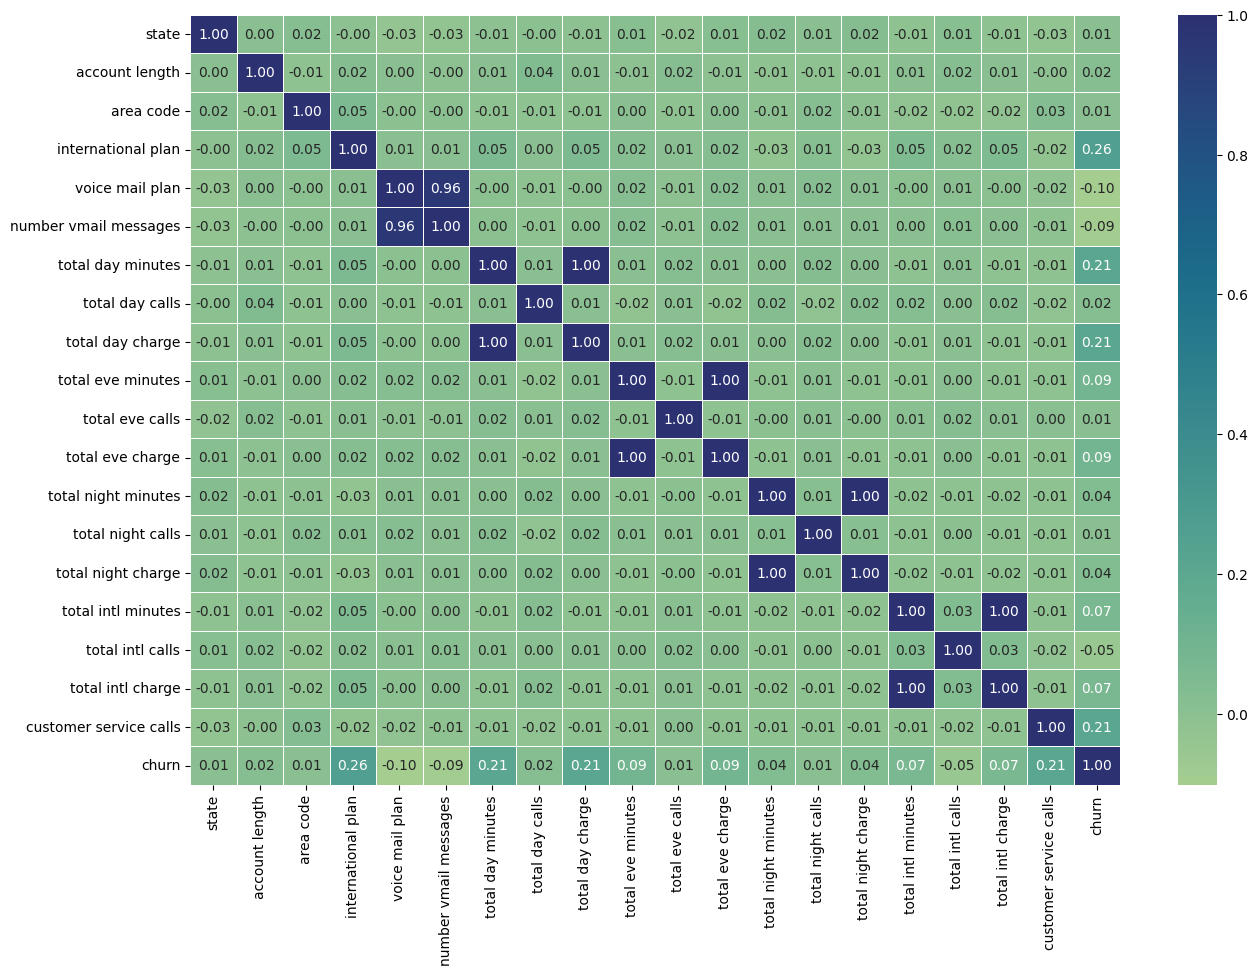

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="crest")

From the above correlation matrix, the following observations were made:

There are four main features that play a big role in the churn rate:
1. Internation plan - 0.26
2. Total day minutes - 0.21
3. Total day charge - 0.21
4. Customer service calls - 0.21

In [32]:
df.dtypes

state                       int64
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

## 3. Balancing the dataset

In [33]:
df.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

The code block above shows that the dataset is unbalanced as the target class, churn, has an uneven distribution of observations.

To balance the dataset, SMOTE from the imblearn will be used.

In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [35]:
X = df.drop("churn", axis=1)
y = df.churn.values

In [36]:
X.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [37]:
X_copy = X.copy()

In [38]:
len(y)

3333

In [39]:
counter = Counter(y)
print(counter)

Counter({0: 2850, 1: 483})


In [40]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [41]:
counter = Counter(y)
print(counter)

Counter({0: 2850, 1: 2850})


### 4. Feature Scaling

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 5. Modeling

In [43]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

### 5.1 Train and test split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
len(X_train)

4560

In [46]:
len(X_test)

1140

### 5.2 Models

In [47]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RFC": RandomForestClassifier()
}

def fit_models(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[model_name] = model.score(X_test, y_test)
    return model_scores

In [48]:
model_scores = fit_models(models, X_train, X_test, y_train, y_test)

In [49]:
model_scores

{'Logistic Regression': 0.75,
 'KNN': 0.8578947368421053,
 'RFC': 0.9447368421052632}

### 5.3 Model Comparison

<Axes: >

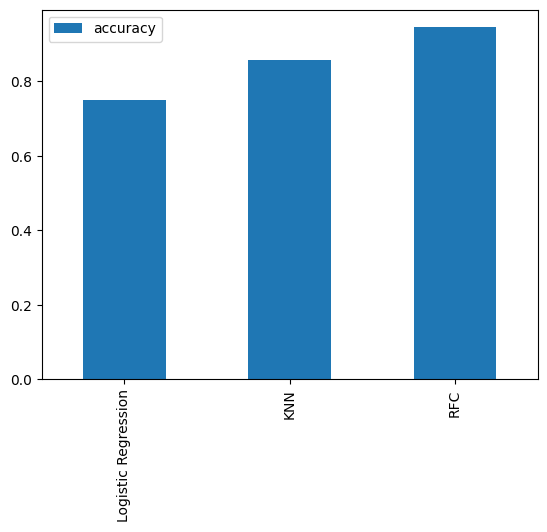

In [50]:
model_comparison = pd.DataFrame(model_scores, index=['accuracy'])
model_comparison.T.plot.bar()

From the above graph, the Random Forest Classifier performs best among the three models.

## 6. Hyperparameter tuning and cross-validation

### 6.1 Tuning models with GridSearchCV

In [51]:
rfc_grid = {"n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]}

Tuning the Random Forest Classifier

In [52]:
np.random.seed(42)

grid_search_rfc = GridSearchCV(RandomForestClassifier(),
                               param_grid=rfc_grid,
                               cv=5,
                               verbose=True)
grid_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [53]:
grid_search_rfc.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
grid_search_rfc.score(X_test, y_test)

0.9526315789473684

## 7. Other ways of model evaluatiion

In [55]:
y_preds = grid_search_rfc.predict(X_test)
y_preds

array([0, 1, 1, ..., 0, 1, 1])

In [56]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

### 7.1 ROC Curve and AUC Scores

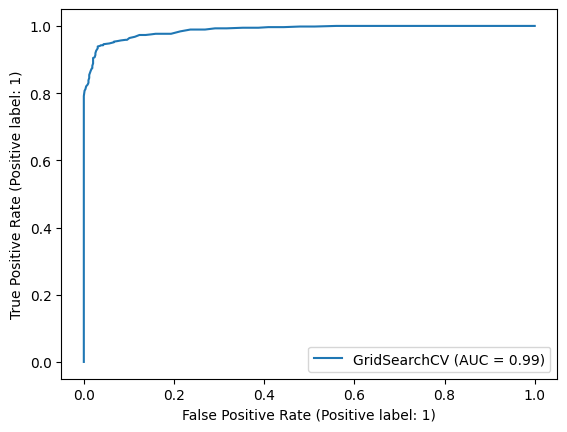

In [57]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=grid_search_rfc,
                               X=X_test,
                               y=y_test)

### 7.2 Confusion matrix

In [58]:
cm = confusion_matrix(y_test, y_preds)

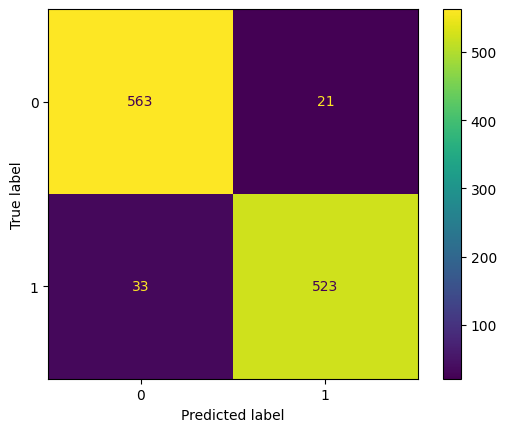

In [59]:
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
display_cm.plot()
plt.show()

### 7.3 Classification report

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       584
           1       0.96      0.94      0.95       556

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



## 8. Feature Importance

In [61]:
# Get the best parameters
grid_search_rfc.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [62]:
rfc_model = RandomForestClassifier()

In [63]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
feature_importances = rfc_model.feature_importances_

In [65]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


<Axes: >

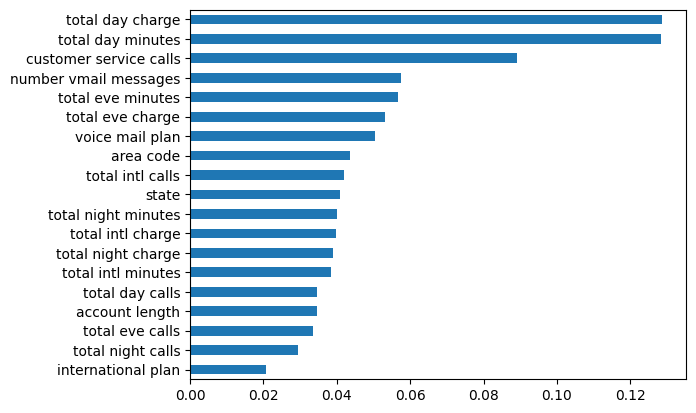

In [66]:
from matplotlib.pyplot import figure
feature_names = pd.Series(feature_importances, index=X_copy.columns).sort_values(ascending=True)
feature_names.plot(kind='barh')